In [1]:
%reset
import numpy as np
from matplotlib import pyplot as plt
import math
from numpy import ma
import os
#%matplotlib inline 
%matplotlib nbagg 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%qtconsole

## Memory mapping order of arrays

Since memory is linear there is only one order to store data in memory for a 2D (or N-D) array. The ambiguity arise when we decide to represent the array for viewing or indexing. 

There are basically three ways in which an array can be viewed: printing, imaging or indexing. None of this is related to the way arrays are stored in memory, for example we don't know if x[i,j] is followed in memory by x[i+1,j] or by x[i,j+1], and the relation between the three is also arbitrary. So it is worth to summarize in a table:

**Indexing:**  arrays are stored in memory in order x[0,0],x[0,1],.. 

**Printing/Reading:** follows memory order as pen writing. It cannot be changed. 
Note that because of the last index rotating faster, indexing on images is in (y,x) format. This also means that shape definitions are in (ny,nx) order.

**Image:** plotting an array with imshow default. data or visualization orientations can be modified with options.





## Examples

### Order of arrays in memory and reshaping

*flatten* and *reshape* respectively transform from matrix to vector and viceversa, following the rules above for memory order.

We define vectors *x* and *y* and their matrix version *xm* and *ym*. 

Approfondimento: un array n-dimensionale e' in effetti un vettore con appiccicate informazioni sulla forma,

Functions in following code:
* np.meshgrid(xvector,yvector)
* array.flatten()
* array.reshape()

In [3]:
#this creates data for point lists x and y. 
# np.meshgrid(xvector,yvector) return two 2d arrays with values from xvector and yvector with suitable shapes.
# Indexing (xy or ij, with xy default) can be arbitrarily set.
# The command is useful to associate x and y from axis coordinates to a 2D matrix.

#
# array.flatten() returns the array in the order of memory storage. So we can verify that matrices areprinted by row.
# With this information we can also observe that meshgrid interlaces x and replicate y
# (the effect, after giving shape is replicating the first vector along vertical axis (first index), and second vector 
# along horizontal).
# another view is first is replicated in memory, and second is interlaced (replicated then transposed).
xgrid,ygrid=np.arange(5),np.arange(10)
xm,ym=np.meshgrid(xgrid,ygrid)
x,y=[xx.flatten() for xx in (xm,ym)]
print xm
print ym

#note that ny=len(x) and viceversa
print xm.shape

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]
 [6 6 6 6 6]
 [7 7 7 7 7]
 [8 8 8 8 8]
 [9 9 9 9 9]]
(10L, 5L)


In [4]:
#This is how vectors are stored in memory (meshgrid rotates on the first vector faster).
x

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4])

In [5]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9,
       9, 9, 9, 9])

In [6]:
#reshape form a matrix from a vector, matrix is populated from elements in reading order (row by row).
#Python array printing (and plot) is in linear algebra convention (first index is the number of the row) as opposite to
#    image convention in which first axis is horizontal. This is the same as writing (in the conventional sense) 
#   in memory order.
#Elements are stored in memory in reading order (cycling on last
#index is faster). This is the same as C, opposite as Fortran and IDL.
#Then the array is printed row by row in memory order, i.e. xm[0,0],xm[0,1],...
print x.reshape(10,5)
print '----'
print xm

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
----
[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


Plots are described following, for now, observe how default matrix plot as python imshow follows the same display order in printing and in visualization.


[0 1 2 3 4][0 0 0 0 0]
[0 1 2 3 4][1 1 1 1 1]
[0 1 2 3 4][2 2 2 2 2]
[0 1 2 3 4][3 3 3 3 3]
[0 1 2 3 4][4 4 4 4 4]
[0 1 2 3 4][5 5 5 5 5]
[0 1 2 3 4][6 6 6 6 6]
[0 1 2 3 4][7 7 7 7 7]
[0 1 2 3 4][8 8 8 8 8]
[0 1 2 3 4][9 9 9 9 9]


<IPython.core.display.Javascript object>


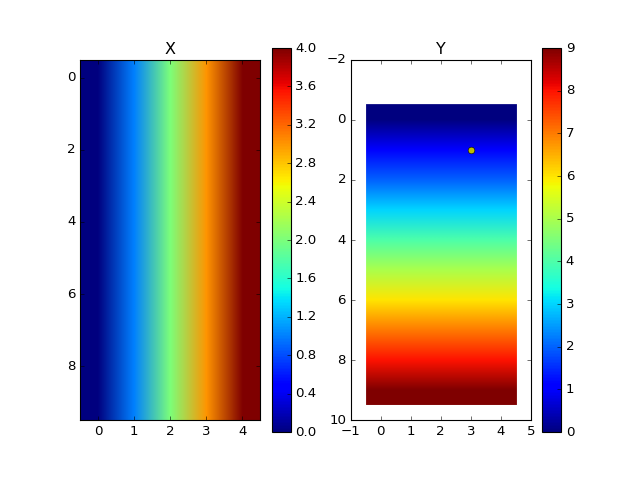

In [7]:
print '\n'.join([str(i)+str(j) for i,j in zip(xm,ym)])

plt.figure(1)
plt.clf()
plt.subplot(121)
plt.imshow(x.reshape(10,5),interpolation='none')
plt.title('X')
plt.colorbar()

plt.subplot(122)
plt.imshow(y.reshape(10,5),interpolation='none')
plt.title('Y')
plt.colorbar()
#display(plt.gcf())


### Plotting coordinates

In last plot we observed as plotted values of plt.imshow(matrix) matches the printed representation of the matrix. Looking more in detail, also axes values follow matrix indices, where the vertical axis is inverted in a cartesian way.
from data coordinates to array indexing a point is given by `data[i(y),j(x)]`.
(seeing data as image, i index is vertical from top to bottom, j index horizontal from left to right).
If coordinate range is left as default, it follows the order set by origin (it will match ).
Even if we can here match the index for plot (switching x and y as example below), we usually don't want axis oriented that way.

In [8]:
print '\n'.join([str(i)+str(j) for i,j in zip(xm,ym)])

plt.figure(1)
plt.clf()
plt.subplot(121)
plt.imshow(x.reshape(10,5))
plt.title('X')
plt.colorbar()

plt.subplot(122)
plt.imshow(y.reshape(10,5))
plt.title('Y')
plt.colorbar()
#display(plt.gcf())

xt,yt=3,1
print 'y[%i,%i]=%i'%(xt,yt,(y.reshape(10,5))[xt,yt])
print 'y[%i,%i]=%i'%(yt,xt,(y.reshape(10,5))[yt,xt])
print 'marked (%i,%i)'%(xt,yt)
plt.plot([xt],[yt],'oy')

[0 1 2 3 4][0 0 0 0 0]
[0 1 2 3 4][1 1 1 1 1]
[0 1 2 3 4][2 2 2 2 2]
[0 1 2 3 4][3 3 3 3 3]
[0 1 2 3 4][4 4 4 4 4]
[0 1 2 3 4][5 5 5 5 5]
[0 1 2 3 4][6 6 6 6 6]
[0 1 2 3 4][7 7 7 7 7]
[0 1 2 3 4][8 8 8 8 8]
[0 1 2 3 4][9 9 9 9 9]
y[3,1]=3
y[1,3]=1
marked (3,1)



Coordinates on plot axis add an independent degree of freedom. The link between coordinates and image is set at the moment of plot. Subsequent plots will be consistent with that coordinates. 

Coordinates can be explictely set with the keyword *extent*. 
However *extent* is not associated with data, if data are provided as matrix, care must be taken to preserve the correct orientation of the axis. 
Plotting data orientation can be modified with *origin* and is not influenced by *extent*.
If not explicitely set with *extent*, coordinates will match matrix indices (with i on vertical axis and j on horizontal).

Also, with origin='lower' default (no *extent* set) axes orientation is cartesian, of course this way the yaxis is flipped wrt the printed representation.

In other words, to fix the registration options are:
* a plot point x,y will correspond to some matrix element m[i(y),j(x)] use origin='lower' and cartesian axis
* origin='lower' and transpose matrix will give cartesian correspondance m[i(x),j(y)] with x and y on original matrix if x and y are increasing respectively to the right and to the bottom ("data-saving order").
* same but without origin, follows x and y as cartesian on printed matrix

The most common case is wanting cartesian coordinates and assuming matrix was saved in writing order (increasing order of x for column and increasing order of y from row). 
The easiest thing is taking the printed representation of the array as a matrix, remembering that axis are switched wrt to cartesian coordinates and vertical axis is oriented towards bottom.
When plotted, image should be plotted with origin='lower'. This will also give the correct axis orientation (and correspondance with indices, switched) in case  *extent* is not provided. It's unfortunate this is not the default and it will give occasionally problem of data exchange, but it is the least evil.
If *extent* is given is expected to match cartesian order.
If for any reason data were saved in cartesian order, it is better to flip the matrix vertically on data reading/generation, `np.flipud()`, so not to maintain deeper functions unchanged with origin='lower' and to obtain the cartesian orientation when no extent is provided. 



We want cartesian axis. This can be done by setting coordinates with **extent**, 

<IPython.core.display.Javascript object>


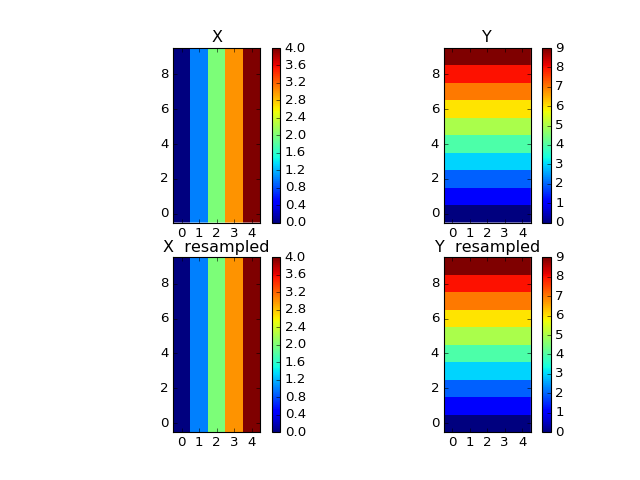

y[3,1]=3
y[1,3]=1 <-correct!
marked (3,1)


In [9]:
#Note that the keyword ORIGIN allows to change posion of the starting data corner from 
# upper left to lower left. The effect is flipping vertically in data image representation.
# This is useful e.g. if reading from file a matrix where y coordinate is increasing for each line
# gives same orientation as data.
# This has no effect on the extent, that needs to be separately set to allow a correct registration.

plt.figure(2)
plt.subplot(121)
plt.imshow(x.reshape(10,5), interpolation='none',origin='lower')
plt.title('X')
plt.colorbar()

plt.subplot(122)
plt.imshow(y.reshape(10,5), interpolation='none',origin='lower')
           
plt.title('Y')
plt.colorbar()
#display(plt.gcf())
xt,yt=3,1
print 'y[%i,%i]=%i'%(xt,yt,(y.reshape(10,5))[xt,yt])
print 'y[%i,%i]=%i <-correct!'%(yt,xt,(y.reshape(10,5))[yt,xt])
print 'marked (%i,%i)'%(xt,yt)
plt.plot([xt],[yt],'oy')

<IPython.core.display.Javascript object>


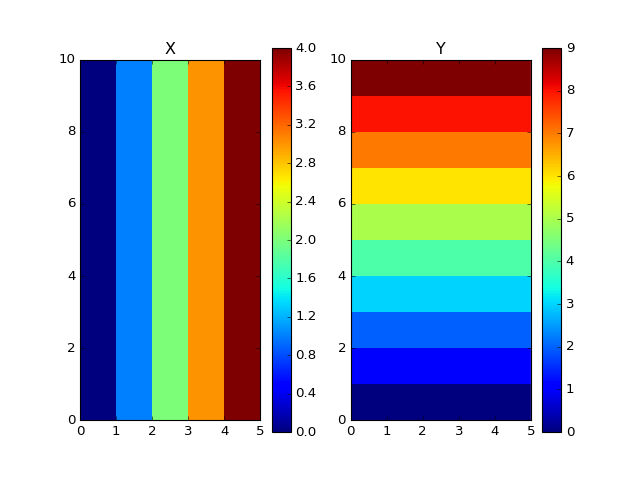

In [114]:
#Note that the keyword EXTENT goes in order as ordinary cartesian axis and doesn't modify data,
# only axis labels. Also we use interpolation='none' for a more truthful representation.
#Note also that in previous plot pixels were centered on points coordinates, 
# while extent goes from side to side. There are no options to obtain 
# coordinates on pixel center, if not manually calculating extent, e.g.:
#     d2=0.5  #assuming this is half distance between points, same in x and y
#     extent=(0-d2,5+d2,0-d2,10+d2)

d2=0.5

plt.figure(2)
plt.clf()
plt.subplot(121)
plt.imshow(x.reshape(10,5),extent=(0,4,0,9), interpolation='none',origin='lower')
plt.title('X')
plt.colorbar()

plt.subplot(122)
plt.imshow(y.reshape(10,5),extent=(0,4,0,9), interpolation='none',origin='lower')
plt.title('Y')
plt.colorbar()
#display(plt.gcf())

plt.figure(2)
plt.clf()
plt.subplot(121)
plt.imshow(x.reshape(10,5),extent=(0-d2,5+d2,0-d2,10+d2), interpolation='none',origin='lower')
plt.title('X')
plt.colorbar()

plt.subplot(122)
plt.imshow(y.reshape(10,5),extent=(0-d2,5+d2,0-d2,10+d2), interpolation='none',origin='lower')
plt.title('Y')
plt.colorbar()
#display(plt.gcf())

When coordinates are expressed as a triple of coordinates there is no ambiguity it is always possible to plot the real position of points with scatterplot (points can be passed as vectors or matrices):


In [10]:
#scatter plot

plt.figure(2)
plt.clf()
plt.subplot(131)
plt.imshow(y.reshape(10,5),origin='lower',interpolation='none')
plt.title('Y auto extent')
plt.colorbar()
#display(plt.gcf())

plt.subplot(132)
plt.imshow(y.reshape(10,5),extent=(0,-5,0,-10),interpolation='none')
plt.scatter(xm, ym, marker='s',c=ym, s=200, edgecolors='white')
#plt.imshow(x.reshape(10,5),extent=(0,5,0,10))
plt.title('Inverted extent')
plt.colorbar()

plt.subplot(133)
plt.imshow(y.reshape(10,5),extent=(0,-5,0,-10),origin='lower',interpolation='none')
plt.scatter(xm, ym, marker='s',c=ym, s=200, edgecolors='white')
#plt.imshow(x.reshape(10,5),extent=(0,5,0,10))
plt.title('origin=lower')
plt.colorbar()

Caption: in first panel test data are plotted with imshow and no extent. *origin* modifies the order for data plotting in vertical direction, but has no effect on coordinates. However as data are plotted they are linked to coordinates determined by *extent* (implicitily or esplicitally).

In [11]:
plt.imshow(y.reshape(10,5),extent=(-0.5,4.5,-0.5,9.5),interpolation='none',origin='lower')
plt.scatter(xm, ym, marker='s',c=ym, s=200, edgecolors='white')
#plt.imshow(x.reshape(10,5),extent=(0,5,0,10))
plt.title('Scatterplot on top of imshow')

##  Resampling and interpolating functions

See examples at http://scipy-cookbook.readthedocs.io/items/Matplotlib_Gridding_irregularly_spaced_data.html

### matplotlib.mlab.griddata

This is the griddata function from matplotlib.
    zi = griddata(x,y,z,xi,yi) 
    
    #interpolate x,y,z on xi,yi. xi, yi.
    #xi and yi on a rectangular grid (with even or uneven spacing),
    #can be vectors or 2d arrays, if vectors, must be monotonic increasing.
    #For more advanced interpolation, see *matplotlib.tri.Triangulation* and *matplotlib.tri.TriInterpolator*
    

We import it as mlgriddata.



In [12]:
#zi = griddata(x,y,z,xi,yi) 
#interpolate x,y,z on xi,yi. xi, yi.
#xi and yi on a recttangular grid (with even or uneven spacing),
#can be vectors or 2d arrays, if vectors, must be monotonic.
#interp can be set to 'nn' or 'linear'. If linear xi, yi must have regular spacing.
#For more advanced interpolation, see *matplotlib.tri.Triangulation* and *matplotlib.tri.TriInterpolator*

from matplotlib.mlab import griddata as mlgriddata


In [13]:
print xm


[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


#### Test with xi and yi as vectors

In [14]:
mlgriddata(x,y,y,np.arange(5),np.arange(10),interp='linear').shape


(10L, 5L)

In [15]:
# griddata(x, y, z, xi, yi, interp='nn')
#griddata works differently, note that the order in this case doesn't matter,
#    since the position is determined by the association between x, y, z.
#    they refer to the actual x,y,z coordinates of the point cloud, with no  
#    relation to python representation, but the output does, the result is returned as a python matrix (ny,nx).
#    here, xi (the first axis on which to resample) is horizontal, yi is vertical and they are oriented.

plt.clf()
plt.subplot(221)
plt.imshow(x.reshape(10,5),vmin=0,vmax=4,interpolation='none',origin='lower')
plt.title('X')
plt.colorbar()

plt.subplot(222)
plt.imshow(y.reshape(10,5),vmin=0,vmax=9,interpolation='none',origin='lower')
plt.title('Y')
plt.colorbar()
#display(plt.gcf())

#to resample the data with griddata in the ordinary sense (for python), 
# transpose the result
# (or keep x y z in gridddata and transpose any reshape result and see it as 
#    an x,y image).
#    Not sure which one is the best approach.

plt.subplot(223)
plt.title('X  resampled')
plt.imshow(mlgriddata(x,y,x,np.arange(5),np.arange(10),interp='linear'),
           vmin=0,vmax=4,interpolation='none',origin='lower')
plt.colorbar()
plt.subplot(224)
plt.title('Y  resampled')
plt.imshow(mlgriddata(x,y,y,np.arange(5),np.arange(10),interp='linear'),
           vmin=0,vmax=9,interpolation='none',origin='lower')
plt.colorbar();
#display(plt.gcf())

In [16]:

print x
print y
print mlgriddata(x,y,y,np.arange(5.),np.arange(10.),interp='linear')
print y.reshape(10,5);

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1
 2 3 4 0 1 2 3 4 0 1 2 3 4]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]
[[0.0 0.0 0.0 0.0 0.0]
 [1.0 1.0 1.0 1.0 1.0]
 [2.0 2.0 2.0 2.0 2.0]
 [3.0 3.0 3.0 3.0 3.0]
 [4.0 4.0 4.0 4.0 4.0]
 [5.0 5.0 5.0 5.0 5.0]
 [6.0 6.0 6.0 6.0 6.0]
 [7.0 7.0 7.0 7.0 7.0]
 [8.0 8.0 8.0 8.0 8.0]
 [9.0 9.0 9.0 9.0 9.0]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]
 [6 6 6 6 6]
 [7 7 7 7 7]
 [8 8 8 8 8]
 [9 9 9 9 9]]


In [17]:
#it works also for matrix input
print x
print y
print mlgriddata(x,y,y,xm,ym,interp='linear')
print y.reshape(10,5);

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1
 2 3 4 0 1 2 3 4 0 1 2 3 4]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]
[[0.0 0.0 0.0 0.0 0.0]
 [1.0 1.0 1.0 1.0 1.0]
 [2.0 2.0 2.0 2.0 2.0]
 [3.0 3.0 3.0 3.0 3.0]
 [4.0 4.0 4.0 4.0 4.0]
 [5.0 5.0 5.0 5.0 5.0]
 [6.0 6.0 6.0 6.0 6.0]
 [7.0 7.0 7.0 7.0 7.0]
 [8.0 8.0 8.0 8.0 8.0]
 [9.0 9.0 9.0 9.0 9.0]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]
 [6 6 6 6 6]
 [7 7 7 7 7]
 [8 8 8 8 8]
 [9 9 9 9 9]]


In [18]:
#Note that if there are points outside boundaries, a masked array is returned.
#This for example are the values for the second figure above, note how z is truncated in a vertical direction.
#Griddata returns a masked array when there are missing points.
mlgriddata(x,y,y,np.arange(10),np.arange(5),interp='linear')

masked_array(data =
 [[0.0 0.0 0.0 0.0 0.0 -- -- -- -- --]
 [1.0 1.0 1.0 1.0 1.0 -- -- -- -- --]
 [2.0 2.0 2.0 2.0 2.0 -- -- -- -- --]
 [3.0 3.0 3.0 3.0 3.0 -- -- -- -- --]
 [4.0 4.0 4.0 4.0 4.0 -- -- -- -- --]],
             mask =
 [[False False False False False  True  True  True  True  True]
 [False False False False False  True  True  True  True  True]
 [False False False False False  True  True  True  True  True]
 [False False False False False  True  True  True  True  True]
 [False False False False False  True  True  True  True  True]],
       fill_value = 1e+20)

In [19]:
#a more elaborated plot that shows the effects of changing origin.

# griddata(x, y, z, xi, yi, interp='nn')
#inverting xi and yi

plt.clf()
plt.subplot(321)
plt.imshow(x.reshape(10,5),vmin=0,vmax=4,interpolation='none')
plt.title('X')
plt.colorbar()

plt.subplot(322)
plt.imshow(y.reshape(10,5),vmin=0,vmax=9,interpolation='none')
plt.title('Y')
plt.colorbar()
#display(plt.gcf())


plt.subplot(323)
plt.title('X  resampled')
plt.imshow(mlgriddata(x,y,x,np.arange(10),np.arange(5),interp='linear'),
           vmin=0,vmax=4,interpolation='none')
plt.colorbar()

plt.subplot(324)
plt.title('Y  resampled')
plt.imshow(mlgriddata(x,y,y,np.arange(10.),np.arange(5.),interp='linear'),
           vmin=0,vmax=9,interpolation='none')
plt.colorbar();

plt.subplot(325)
plt.title('X  resampled on inverted axis')
plt.imshow(mlgriddata(x,y,x,np.arange(10.),np.arange(5.),
                      interp='linear'),origin='lower',vmin=0,vmax=4,interpolation='none')
plt.colorbar()

plt.subplot(326)
plt.title('Y  resampled on inverted axis')
plt.imshow(mlgriddata(x,y,y,np.arange(10.),np.arange(5.),
                      interp='linear'),origin='lower',vmin=0,vmax=9,interpolation='none')
plt.colorbar();

#### notes about ordering of input xi and yi

In [20]:
#according to documentation xi and yi must be regular and increasing for 'nn'
# interpolation, non specified for 'linear', 
#in the most ordered case, it is insensitive to order of xi and yi
print x
print y
xi
print mlgriddata(x,y,y,np.arange(5)[::-1],np.arange(10)[::-1],interp='linear')
print y.reshape(10,5);

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1
 2 3 4 0 1 2 3 4 0 1 2 3 4]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]


NameError: name 'xi' is not defined

In [21]:

print x
print y
print mlgriddata(x,y,y,xm[::-1,::-1],ym[::-1,::],interp='linear')
print y.reshape(10,5);

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1
 2 3 4 0 1 2 3 4 0 1 2 3 4]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]
[[9.0 9.0 9.0 9.0 9.0]
 [8.0 8.0 8.0 8.0 8.0]
 [7.0 7.0 7.0 7.0 7.0]
 [6.0 6.0 6.0 6.0 6.0]
 [5.0 5.0 5.0 5.0 5.0]
 [4.0 4.0 4.0 4.0 4.0]
 [3.0 3.0 3.0 3.0 3.0]
 [2.0 2.0 2.0 2.0 2.0]
 [1.0 1.0 1.0 1.0 1.0]
 [0.0 0.0 0.0 0.0 0.0]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]
 [6 6 6 6 6]
 [7 7 7 7 7]
 [8 8 8 8 8]
 [9 9 9 9 9]]


In [22]:
#However it fails if there are points out of boundaries

#correct result

xgrid,ygrid=np.arange(5),np.arange(10)
xm,ym=np.meshgrid(xgrid,ygrid)
x,y=[xx.flatten() for xx in (xm,ym)]

print x.reshape(10,5)
print y.reshape(10,5)
print mlgriddata(x,y,y,np.arange(10.),np.arange(5.),
                      interp='linear')

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]
 [6 6 6 6 6]
 [7 7 7 7 7]
 [8 8 8 8 8]
 [9 9 9 9 9]]
[[0.0 0.0 0.0 0.0 0.0 -- -- -- -- --]
 [1.0 1.0 1.0 1.0 1.0 -- -- -- -- --]
 [2.0 2.0 2.0 2.0 2.0 -- -- -- -- --]
 [3.0 3.0 3.0 3.0 3.0 -- -- -- -- --]
 [4.0 4.0 4.0 4.0 4.0 -- -- -- -- --]]


In [23]:
print mlgriddata(x,y,y,np.arange(10.),np.arange(5.)[::-1],
                      interp='linear')

[[4.0 4.0 4.0 4.0 4.0 -- -- -- -- --]
 [3.0 3.0 3.0 3.0 3.0 -- -- -- -- --]
 [2.0 2.0 2.0 2.0 2.0 -- -- -- -- --]
 [1.0 1.0 1.0 1.0 1.0 -- -- -- -- --]
 [0.0 0.0 0.0 0.0 0.0 -- -- -- -- --]]


In [24]:
print mlgriddata(x,y,y,np.arange(10.)[::-1],np.arange(5.),
                      interp='linear')

[[-- -- -- -- -- 0.0 0.0 0.0 0.0 0.0]
 [-- -- -- -- -- 1.0 1.0 1.0 1.0 1.0]
 [-- -- -- -- -- 2.0 2.0 2.0 2.0 2.0]
 [-- -- -- -- -- 3.0 3.0 3.0 3.0 3.0]
 [-- -- -- -- -- 4.0 4.0 4.0 4.0 4.0]]


In [25]:
print mlgriddata(x,y,y,np.arange(10.)[::-1],np.arange(5.)[::-1],
                      interp='linear')

[[-- -- -- -- -- 4.0 4.0 4.0 4.0 4.0]
 [-- -- -- -- -- 3.0 3.0 3.0 3.0 3.0]
 [-- -- -- -- -- 2.0 2.0 2.0 2.0 2.0]
 [-- -- -- -- -- 1.0 1.0 1.0 1.0 1.0]
 [-- -- -- -- -- 0.0 0.0 0.0 0.0 0.0]]


In [26]:
plt.close('all')

### scipy.interpolate.griddata

In [27]:
#this is griddata from scipy.interpolate.
from scipy.interpolate import griddata as sgriddata
#griddata(points, values, xi, method='linear', fill_value=nan)

In [28]:
#When you pass something to griddata, points are returned as interpolated on xi [Nx2],
#    this sets the order of returned values that are on a vector of size [N].
#Note that this routine entirely act on point clouds, there is no grid defined.
#Then to use this routine to create a grid, the grid must converted to point cloud and back by
#    the user, with care to keep the correct order.

In [29]:
xgrid

array([0, 1, 2, 3, 4])

In [30]:
ygrid

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
#axis vectors for tests.
xs,ys=np.arange(3),np.arange(4,6)

In [32]:
xg,yg=np.meshgrid(xs,ys)
#Returns a tuple of vectors [x,y]. 
#   axis vectors are replicated as rows, then x is returned, y is trasposed (i.e. replicated by column).
#This is the same order as z.reshape(ygrid.size,xgrid.size) in x,y,z points if x is the fast scanning axis in points.
#    Note that we have to transpose all the results if we want the x to correspond to actual x values of z points 
#    (i.e. to plot x|y as vertical|horizontal axis with first row|column corresponding to x|y values).
xg,yg

(array([[0, 1, 2],
        [0, 1, 2]]), array([[4, 4, 4],
        [5, 5, 5]]))

<IPython.core.display.Javascript object>


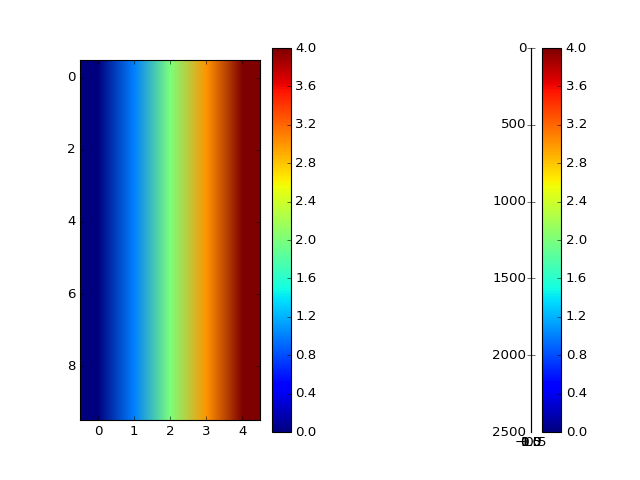

In [33]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])
grid_z0 = sgriddata(points, values, (grid_x, grid_y), method='nearest')
plt.clf()
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
#display(plt.gcf())


In [34]:
grid_x.shape,grid_y.shape,grid_z0.shape

((100L, 200L), (100L, 200L), (100L, 200L))

In [35]:
#This creates a Nx2 list of points. 
np.vstack([g.flatten() for g in np.meshgrid(xs,ys)]).T

array([[0, 4],
       [1, 4],
       [2, 4],
       [0, 5],
       [1, 5],
       [2, 5]])

In [36]:
#create two sets of points N x 3 with x respectively as fast or slow axis.

##create x,y,z vectors
fast,slow=[g.flatten() for g in np.meshgrid(xs,ys)];
z=fast+slow**2
fast,slow,z
##create sets of points
pf=np.vstack([fast,slow,z]).T
ps=pf[pf[:,0].argsort(),:]  #sort by first column
#pf and ps have exactly same points, but sorted in different order.
pf,ps

(array([[ 0,  4, 16],
        [ 1,  4, 17],
        [ 2,  4, 18],
        [ 0,  5, 25],
        [ 1,  5, 26],
        [ 2,  5, 27]]), array([[ 0,  4, 16],
        [ 0,  5, 25],
        [ 1,  4, 17],
        [ 1,  5, 26],
        [ 2,  4, 18],
        [ 2,  5, 27]]))

In [37]:
#try to reconstruct the grid of points from xs,ys in the case of fast x.
xm,ym=np.meshgrid(xs,ys);  #in the general case xs and ys are generic vectors, 
# unrelated with how z is constructed, so we cannot simply reshape x and y
zm=pf[:,2].reshape(ys.size,xs.size)
xm,ym,zm

(array([[0, 1, 2],
        [0, 1, 2]]), array([[4, 4, 4],
        [5, 5, 5]]), array([[16, 17, 18],
        [25, 26, 27]]))

In [38]:
#try to reconstruct the grid of points from xs,ys in the case of fast y.
ps[:,2].reshape(xs.size,ys.size).T

array([[16, 17, 18],
       [25, 26, 27]])

In [39]:
xm,ym=np.meshgrid(xs,ys);
zm=z.reshape(xs.size,ys.size).T
xm,ym,zm

(array([[0, 1, 2],
        [0, 1, 2]]), array([[4, 4, 4],
        [5, 5, 5]]), array([[16, 18, 26],
        [17, 25, 27]]))

In [231]:
print np.vstack((x,y)).T.shape
print sgriddata(np.vstack((x,y)).T,y,np.vstack((x,y)).T)


(50L, 2L)
[ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.
  3.  3.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.
  7.  7.  7.  7.  8.  8.  8.  8.  8.  9.  9.  9.  9.  9.]


In [40]:
plt.clf()
plt.subplot(121)
plt.imshow(mlgriddata(x,y,x,np.arange(5),np.arange(10),interp='linear'))
plt.colorbar()
plt.subplot(122)
xy=np.hstack([xgrid,ygrid])
xygrid=np.vstack([g.flatten() for g in  np.meshgrid(x,y)]).T
img=sgriddata(xy,x,xygrid)
plt.imshow(img)
plt.colorbar();

### timing test on a regular grid, with linear interpolation.

The matplotlib routine is much faster, tests give 2 times faster with small data (this example) and 7 times faster with larger data set (real data test). 

In [41]:
z=x**2+y
xy=np.hstack([xgrid,ygrid])
xygrid=np.vstack([g.flatten() for g in  np.meshgrid(x,y)]).T

In [42]:
%timeit mlgriddata(x,y,z,xgrid,ygrid,interp='linear')

1000 loops, best of 3: 893 µs per loop


In [43]:
%timeit sgriddata(xy,z,xygrid,method='linear')

10000 loops, best of 3: 160 µs per loop


In [44]:
x


array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4])

### Rebinning

It can be done by using `scipy.stats.binned_statistic_2d`.
Note that this works in a slightly different way, if the number of bins is same as number of points, the result.

In [45]:
d=np.vstack([f.flatten() for f in np.meshgrid(np.arange(3),np.arange(3)+10.)]).T
d=np.vstack([d.T,d[:,0]**2+d[:,1]**2]).T

In [46]:
from pySurf import points as pp
from scipy import stats
from dataIO.span import span

plt.figure(2)
pp.plot_points(d,scatter=True,s=500)
plt.imshow(d[:,2].reshape((3,3)),interpolation='none',aspect='auto')
plt.clf()

plt.figure(3)
plt.imshow(d[:,2].reshape((3,3)),interpolation='none',aspect='auto',
           extent=np.hstack([span(d[:,0]),span(d[:,1])]))

plt.figure(4)
x,y,z=zip(*d)
ss=stats.binned_statistic_2d(x,y,z,bins=3)
plt.pcolormesh(ss[1],ss[2],ss[0])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
d=np.vstack([f.flatten() for f in np.meshgrid(np.arange(3),np.arange(4)+10.)]).T
d=np.vstack([d.T,d[:,0]**2+d[:,1]**2]).T

In [48]:

from pySurf import points as pp
from scipy import stats
from dataIO.span import span

plt.figure(2)
pp.plot_points(d,scatter=True,s=500)
plt.imshow(d[:,2].reshape((3,4)),interpolation='none',aspect='auto')
plt.clf()

plt.figure(3)
plt.imshow(d[:,2].reshape((3,4)),interpolation='none',aspect='auto',
           extent=np.hstack([span(d[:,0]),span(d[:,1])]))

plt.figure(4)
x,y,z=zip(*d)
ss=stats.binned_statistic_2d(x,y,z,bins=(3,4))
plt.pcolormesh(ss[1],ss[2],ss[0])

TypeError: Dimensions of C (3L, 4L) are incompatible with X (4) and/or Y (5); see help(pcolormesh)

In [ ]:
## test of REBIN code implemented in my libraries